# Laboratorio 4 - Inteligencia Artificial

## Autores:

- Nelson García
- Andy Fuentes
- Davis Roldan
- Ricardo Chuy
- Diederich Solís

## Task 1 - Preguntas teóricas

#### 1. Grafos Computacionales y su Importancia en Backpropagation

**Grafos Computacionales**: Los grafos computacionales son representaciones gráficas de operaciones matemáticas donde los nodos representan variables o operaciones, y las aristas representan el flujo de datos entre estas operaciones. Son útiles para visualizar y calcular derivadas parciales en redes neuronales, lo que es esencial para el proceso de backpropagation.

**Importancia en Backpropagation**: En el contexto de backpropagation, los grafos computacionales permiten calcular gradientes de manera eficiente. Durante el paso hacia adelante (forward pass), se calculan los valores de las funciones en cada nodo. Durante el paso hacia atrás (backward pass), se calculan los gradientes utilizando la regla de la cadena, lo que permite actualizar los pesos de la red para minimizar el error. Esto es crucial para entrenar redes neuronales de manera efectiva.

#### 2. Componentes y Pasos de una Red Neuronal y Mejoras al Perceptrón

**Componentes de una Red Neuronal**:
- **Capas de Entrada**: Reciben los datos de entrada.
- **Capas Ocultas**: Realizan transformaciones no lineales de las entradas.
- **Capas de Salida**: Producen la salida final.
- **Pesos y Sesgos**: Parámetros que la red ajusta durante el entrenamiento.
- **Función de Activación**: Introduce no linealidades en el modelo (e.g., ReLU, sigmoide).
- **Función de Pérdida**: Mide el error entre las predicciones y los valores reales.
- **Optimizador**: Ajusta los pesos para minimizar la función de pérdida (e.g., SGD, Adam).

**Mejoras al Perceptrón**:
- **Añadir Capas Ocultas**: Para capturar patrones más complejos.
- **Usar Funciones de Activación No Lineales**: Para permitir que la red modele relaciones no lineales.
- **Implementar Regularización**: Para evitar el sobreajuste (e.g., L2, dropout).
- **Utilizar un Optimizador Avanzado**: Como Adam para mejorar la convergencia.

#### 3. Selección del Valor K usando el Método de la Silueta en K-Means

**Método de la Silueta**: Este método evalúa la calidad de los clusters calculando la silueta para cada punto, que mide cuán similar es un punto a su propio cluster en comparación con otros clusters.

**Fórmula de la Silueta**:El método de la silueta se basa en calcular una métrica para cada punto i  en el conjunto de datos. La métrica de silueta s(i) se define como: 

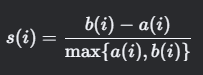

      Donde:
      - a(i) es la distancia promedio del punto i a todos los demás puntos en el mismo cluster.
      - b(i) es la distancia promedio del punto i a todos los puntos en el cluster más cercano.

**Selección de K**: Se calcula la silueta promedio para diferentes valores de K y se selecciona el K que maximiza esta medida. Un valor de silueta cercano a 1 indica que el punto está bien asignado, mientras que un valor cercano a -1 indica una posible mala asignación.

**Asunciones**: Se asume que los clusters son compactos y bien separados.

#### 4. Principal Component Analysis (PCA) y su Uso con K-Means

**PCA**: Es una técnica de reducción de dimensionalidad que transforma los datos a un espacio de menor dimensión, manteniendo la mayor varianza posible.

**Mejora de Clusters con K-Means**:
- **Reducción de Ruido**: PCA puede eliminar componentes con poca varianza, que a menudo corresponden a ruido.
- **Reducción de Dimensionalidad**: Al reducir la dimensionalidad, PCA puede hacer que K-Means sea más eficiente y menos propenso al problema de la maldición de la dimensionalidad.
- **Visualización**: Facilita la visualización de clusters en 2D o 3D, lo que puede ayudar a entender la estructura de los datos.

Al aplicar PCA antes de K-Means, se puede mejorar la calidad de los clusters al enfocarse en las direcciones de máxima varianza, que suelen contener la información más relevante.

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

#### Task 2.1.1 - K-Means

### Ejercicio realizado 'a mano'

Se importan las librerías a utilizar.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.spatial.distance as metric

Se lee el dataset.

In [84]:
dataset = pd.read_csv('documents/bank_transactions.csv')

Visualizar los datos.

In [85]:
dataset.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [86]:
dataset.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


##### Elección de variables

Saldo de la Cuenta del Cliente (CustAccountBalance)

El saldo de la cuenta es un indicador clave del poder adquisitivo y el comportamiento financiero del cliente. Puede ayudar a distinguir entre clientes de alto, medio y bajo poder adquisitivo, lo que es crucial para segmentación en productos bancarios.

Dinero de la Transacción (TransactionAmount (INR))

Indica el comportamiento de gasto y la frecuencia de uso de la cuenta. Permite diferenciar clientes de alto valor (con altos saldos y transacciones grandes) de clientes más activos pero con saldos menores.

Convertir CustomerDOB a edad de cada cliente

Ahora que se tiene la edad se puede comenzar el proceso de clustering.

In [88]:
X = dataset.filter(['CustAccountBalance', 'TransactionAmount (INR)'])
X = np.array(X)
X = X[~np.isnan(X).any(axis=1)]  # Eliminar filas con NaN
X = X[~np.isinf(X).any(axis=1)]  # Eliminar filas con Inf

In [89]:
np.random.seed(42)  # Fijar semilla para resultados reproducibles
X = X[np.random.choice(X.shape[0], 25000, replace=False)]

print(f"Forma de X después de la limpieza: {X.shape}")

X

Forma de X después de la limpieza: (25000, 2)


array([[3.5003000e+04, 3.2500000e+02],
       [7.1649612e+05, 5.1900000e+02],
       [3.1788360e+04, 3.0000000e+01],
       ...,
       [1.9892000e+03, 9.2300000e+02],
       [3.9090750e+04, 1.7900000e+02],
       [6.1421320e+04, 2.0820000e+03]])

In [90]:
def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data, k, index, centroids, orig_centroids):
    input = np.array(index, dtype=int)  # Asegurar que es un array de enteros
    
    colors = ["g", "r", "c", "b", "m", "y", "orange", "purple", "pink", "gray"]  # Hasta 10 clusters

    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

    # Graficar los puntos según su cluster
    for i in range(k):
        cluster_points = data[input == i]  # Filtrar puntos del cluster i
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    color=colors[i % len(colors)], s=50, alpha=0.6, label=f"Cluster {i+1}")

    # Graficar los centroides finales
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", color="black", s=75, 
                edgecolors="white", linewidth=2, label="Centroides Finales")

    # Graficar los centroides originales
    plt.scatter(orig_centroids[:, 0], orig_centroids[:, 1], marker="D", color="blue", s=75, 
                edgecolors="white", linewidth=2, label="Centroides Originales")

    # Configurar títulos y etiquetas
    plt.title("Segmentación de Clientes - K-Means", fontsize=14, fontweight="bold")
    plt.xlabel("Saldo de la Cuenta (INR)", fontsize=12)
    plt.ylabel("Monto de la Transacción (INR)", fontsize=12)
    
    # Agregar la leyenda
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()



Función principal de k-means

In [91]:
class K_Means:
    def __init__(self, k, data, centeriod_init=None, max_iter=50, tol=1e-4):
        self.k = k
        self.data = np.array(data)  # Convertir a array de NumPy si aún no lo es
        self.centeriod_init = centeriod_init
        self.max_iter = max_iter
        self.tol = tol  # Umbral de convergencia

    def initialise_centroids(self):
        if self.centeriod_init == 'random':
            initial_centroids = np.random.permutation(self.data.shape[0])[:self.k]
            self.centroids = self.data[initial_centroids]
        elif self.centeriod_init == 'firstk':
            self.centroids = self.data[:self.k]
        else:
            self.centroids = np.array([self.data[i % self.k] for i in range(self.k)])
        return self.centroids

    def fit(self):
        m = self.data.shape[0]
        cluster_assignments = np.zeros((m, 2))

        self.centroids = self.initialise_centroids()
        orig_centroids = self.centroids.copy()  # Guardar los centroides originales
        prev_centroids = np.zeros_like(self.centroids)

        changed = True
        num_iter = 0

        while changed and num_iter < self.max_iter:
            changed = False
            for i in range(m):
                min_dist = np.inf
                min_index = -1
                for j in range(self.k):
                    dist_ji = metric.euclidean(self.centroids[j], self.data[i])
                    if dist_ji < min_dist:
                        min_dist = dist_ji
                        min_index = j

                if cluster_assignments[i, 0] != min_index:
                    changed = True
                cluster_assignments[i] = [min_index, min_dist**2]

            # Actualizar centroides
            for cent in range(self.k):
                points = self.data[np.where(cluster_assignments[:, 0] == cent)]
                if len(points) > 0:
                    self.centroids[cent] = np.mean(points, axis=0)

            # Verificar convergencia
            centroid_shift = np.linalg.norm(self.centroids - prev_centroids)
            if centroid_shift < self.tol:
                print(f"Convergencia alcanzada en {num_iter} iteraciones.")
                break

            prev_centroids = self.centroids.copy()
            num_iter += 1

        return self.centroids, cluster_assignments, num_iter, orig_centroids


Implementación de k-means:

Convergencia alcanzada en 17 iteraciones.


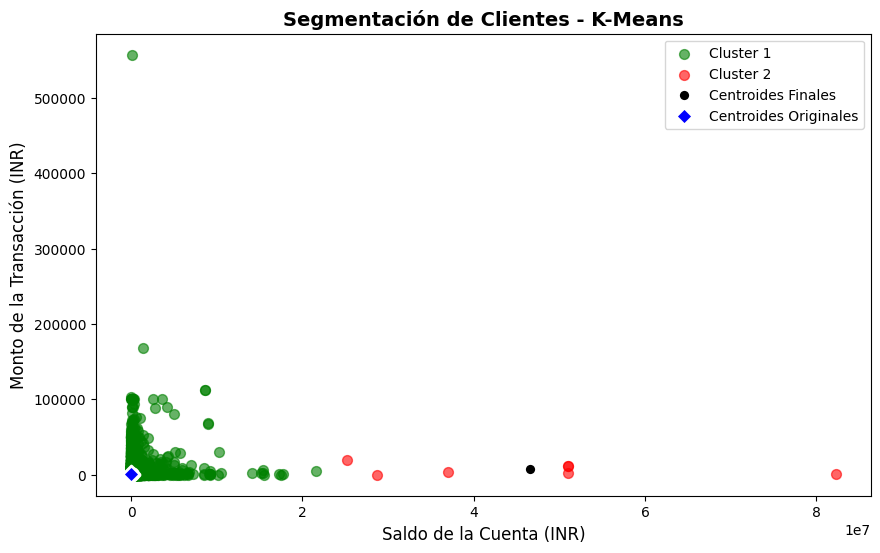

In [92]:
k_ = 2
kmeans = K_Means(k=k_, data=X, centeriod_init='random', max_iter=100, tol=1e-4)
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
plot(X,k_,index,centroids,orig_centroids)

Ahora se usará en método del codo para saber el número óptimo de clusteres (k) para los datos.

In [93]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = X,centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
    cost = sum(distance)/(2*len(X))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)

Convergencia alcanzada en 0 iteraciones.


Text(0, 0.5, 'Dispersion')

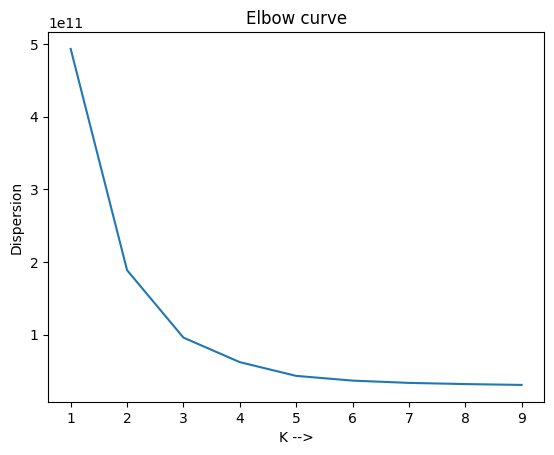

In [94]:
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

Como se puede ver, el 'mejor' valor para k estaría entre 3 y 4 clusteres, tal vez 5.

Para saber mejor qué k elegir vamos utilizar silhouette score para ver que k agrupar mejor los datos.

In [95]:
costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = X,centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(X)):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(X)
    a = sum(cluster_assignments[:,1])/(len(X)-1)
    s = (dist_ji - a)/max(dist_ji,a)
    s = np.array(s)
    s =  s.item()
    costs.append(s)

Convergencia alcanzada en 0 iteraciones.


C:\Users\nel20\AppData\Local\Temp\ipykernel_10828\1534207145.py:14: RuntimeWarning: invalid value encountered in scalar divide
  s = (dist_ji - a)/max(dist_ji,a)


Convergencia alcanzada en 17 iteraciones.
Convergencia alcanzada en 27 iteraciones.
Convergencia alcanzada en 29 iteraciones.
Convergencia alcanzada en 44 iteraciones.
Convergencia alcanzada en 44 iteraciones.


Text(0, 0.5, 'Dispersion')

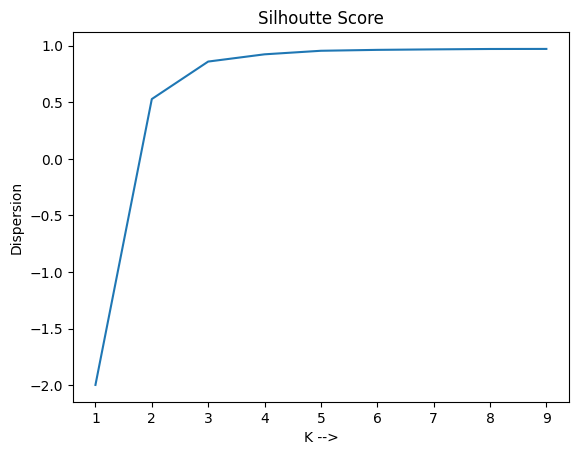

In [96]:
x = np.arange(10)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

Ahora con los resultados del Silhoutte se pude ver también entre 4 y 5. Se tomara a k=4 como la mejor opción para el agrupamiento de los datos. 

Convergencia alcanzada en 27 iteraciones.


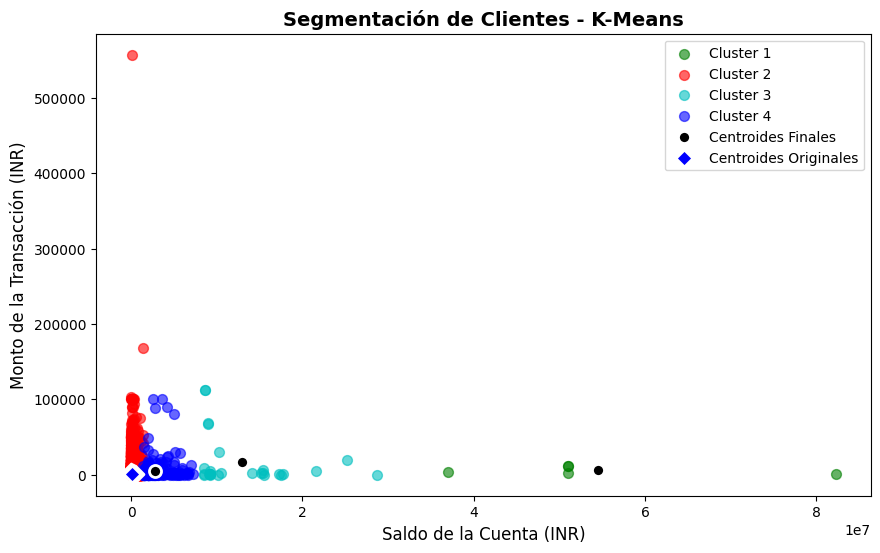

In [97]:
k_ = 4
kmeans = K_Means(k=k_, data=X, centeriod_init='random', max_iter=100, tol=1e-4)
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
plot(X,k_,index,centroids,orig_centroids)

### Ejercicio realizado con librerias

Ahora se realizará el mismo ejercicio de segmentacion de clientes pero utilizando las librerias apropiadas para usar el algoritmo de K-Medias. Con esto se busca realizar grupos con el set de datos de clientes de banco. Se hará selección principalmente de variables numéricas y de ser necesario se transformará alguna variable categórica a numérica si es que se considera relevante para la creación de clusters. 

Además de esto es importante mencionar que el set de datos no se encuentra balanceado, pero esto no representa un problema realmente. Ya que el clustering es un algoritmo de clasificación y aprendizaje no supervisado, no se tiene una columna objetivo. Por lo que no es neceario el balanceo de datos en este caso.

Para determinar el éxito del agrupamiento se usará el método de la silueta. Un recurso particularmente útil para evaluar el desepeño de modelos de agrupamiento como K-means, cluster jerárquico, entre otros.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

: 

In [ ]:
df = pd.read_csv("documents/bank_transactions.csv")

# TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
# T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25

numeric_variables = df[["CustAccountBalance","TransactionAmount (INR)"]]

print(numeric_variables.head())

# Nan
print(numeric_variables.isnull().sum())

imputer = SimpleImputer(strategy='mean')
scaled_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_variables), columns=numeric_variables.columns)

scaled_df_imputed

# Check if NaN values are imputed
print(scaled_df_imputed.isnull().sum())


   CustAccountBalance  TransactionAmount (INR)
0            17819.05                     25.0
1             2270.69                  27999.0
2            17874.44                    459.0
3           866503.21                   2060.0
4             6714.43                   1762.5
CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64
CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df_imputed)

#robust_scaler = RobustScaler()
#robust_scaled_df = robust_scaler.fit_transform(scaled_df_imputed[['CustAccountBalance', 'TransactionAmount (INR)']])

scaled_df = pd.DataFrame(scaled_features, columns=["CustAccountBalance","TransactionAmount (INR)"])
print(scaled_df.head())

   CustAccountBalance  TransactionAmount (INR)
0           -0.115412                -0.235650
1           -0.133801                 4.019119
2           -0.115347                -0.169639
3            0.888320                 0.073868
4           -0.128546                 0.028619


Para verificar la cantidad de clusteres ideal es necesario hacer un gráfico de codo.

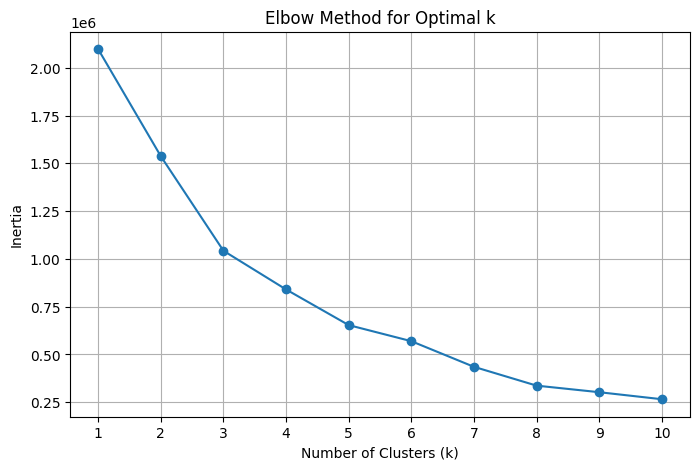

In [ ]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid()
plt.show()

Con este gráfico se puede ver que el número óptimo de clusters probablemente sea 3 o 4.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

# Adding cluster column to original df
# df['Cluster'] = kmeans.labels_

#print(df[['CustAccountBalance', 'TransactionAmount (INR)', 'Cluster']].head())

KMeans(n_clusters=3, random_state=42)

Ademas de agregar la columnha cluster al df original, realizamos la evaluacion con la puntuación de la silueta. Nota: debido a la enorme cantidad de datos (más de 1 millón), se tomará una muestra para realizar la evaluación del clustering hecho por el algoritmo de K-Means.

In [ ]:
sample_fraction = 0.10  
sampled_df = scaled_df.sample(frac=sample_fraction, random_state=42)

print(f"Muestra: {sampled_df.shape}")

silhouette_avg = silhouette_score(sampled_df, kmeans.labels_[sampled_df.index])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# More metrics to see results using the complete data
db_index = davies_bouldin_score(scaled_df, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.3f}")

ch_index = calinski_harabasz_score(scaled_df, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.3f}")

Muestra: (104857, 2)
Silhouette Score: 0.955
Davies-Bouldin Index: 0.472
Calinski-Harabasz Index: 530469.816


Como se puede ver el valor de la métrica de silueta dió un valor de 0.956. Con esta métrica de desempeño, mientras más se acerca el valor a 1, quiere decir que el clustering fue más exitoso. Con ela métrica Davies-Bouldin Index, se obtuve un valor bastante bueno (mientras más cerca de 0 es mejor), lo cuál indica que los clusters se separan bastante bien y son compactos (no se superponen mucho). Ahora la última métrica mientras más alto sea el valor mejor (no tiene un máximo), ya que le valor es grande podemos decir que los clusters están bien diferenciados. Usamos más métricas para corroborar los resultados de la silueta, ya que usar el set de datos completo tomaría demasiado tiempo y recursos.-

#### Resultados del clustering
Los centroides se marcan con una X

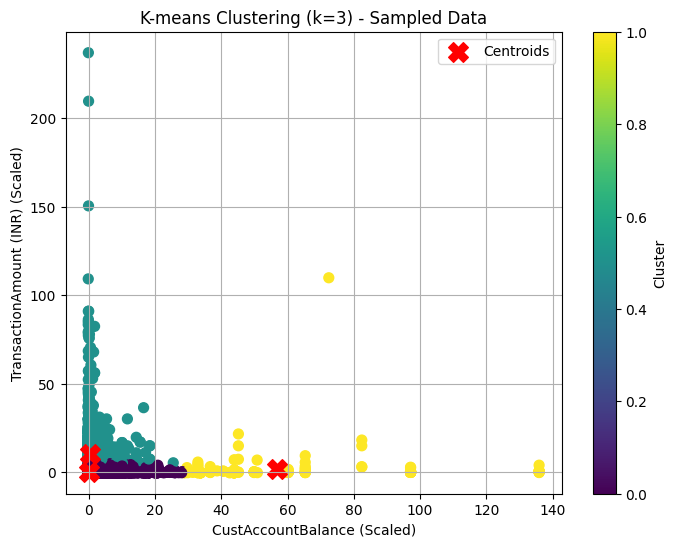

In [ ]:
sssample = 1  # Adjust this as needed
sampled_df = scaled_df.sample(frac=sssample, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(sampled_df.iloc[:, 0], sampled_df.iloc[:, 1], c=kmeans.labels_[sampled_df.index], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('CustAccountBalance (Scaled)')
plt.ylabel('TransactionAmount (INR) (Scaled)')
plt.title('K-means Clustering (k=3) - Sampled Data')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()
plt.show()

#### Alternativa para visualizar

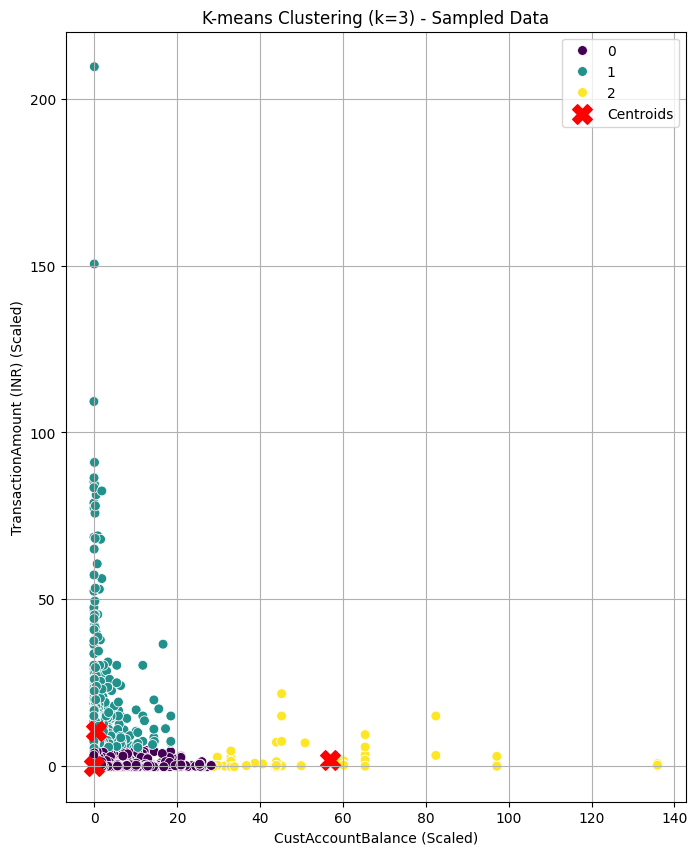

In [ ]:
# Sample
sssample = 0.70  # Adjust this as needed
sampled_df = scaled_df.sample(frac=sssample, random_state=42)

sampled_df['Cluster'] = kmeans.labels_[sampled_df.index]

# Plot using Seaborn
plt.figure(figsize=(8, 10))
sns.scatterplot(data=sampled_df, x='CustAccountBalance', y='TransactionAmount (INR)', hue='Cluster', palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('CustAccountBalance (Scaled)')
plt.ylabel('TransactionAmount (INR) (Scaled)')
plt.title('K-means Clustering (k=3) - Sampled Data')
plt.legend()
plt.grid()
plt.show()

Al final podemos considerar el modelo exitoso debido a la métrica de evaluación de silueta. Lastimosamente no se puede usar el set completo para la evaluación, ya que tomá demasiad tiempo y recursos por la cantidad de datos (el csv tiene más de 1 millón). Es por eso que al final se incluyeron 2 metricas más para corroborar que el uso de una muestra es significativa y correcta. Además, aunque la información en la gráfica se mira abstante pegada a los ejes, esto no quiere decir que los grupos sean incorrectos, el hecho de que entre ellos los datos estén juntos da entender que los grupos son correctos, recordemos que la métrica de silueta evalua la distancia de los puntos al centroide.

### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco